### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 2
### Due: Friday, Sep 08 at 11:59 pm CT

## Problem 1

1) Use `numpy` to draw $1000$ random samples from a uniform distribution between $1$ and $10$, and store these samples as $x$.

2) Use matplotlib to make a histogram of these samples. Try to make this as aesthetically pleasing as possible (within reason).

3) Compute the exponential of your array $x$, and store this as $y$.

4) Make another histogram for $y$. Using the equation to transform probability distributions in `lecture_3`, write here what the theoretical pdf of $y$ is, and overplot it onto your histogram.

5) Compute the mean of $x$ and the mean of $y$. Now compute the median of $x$ and the median of $y$. How the mean and median of x and y compare to each other?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Text(0.5, 1.0, 'Probability distribution of random samples drawn from a uniform distribution')

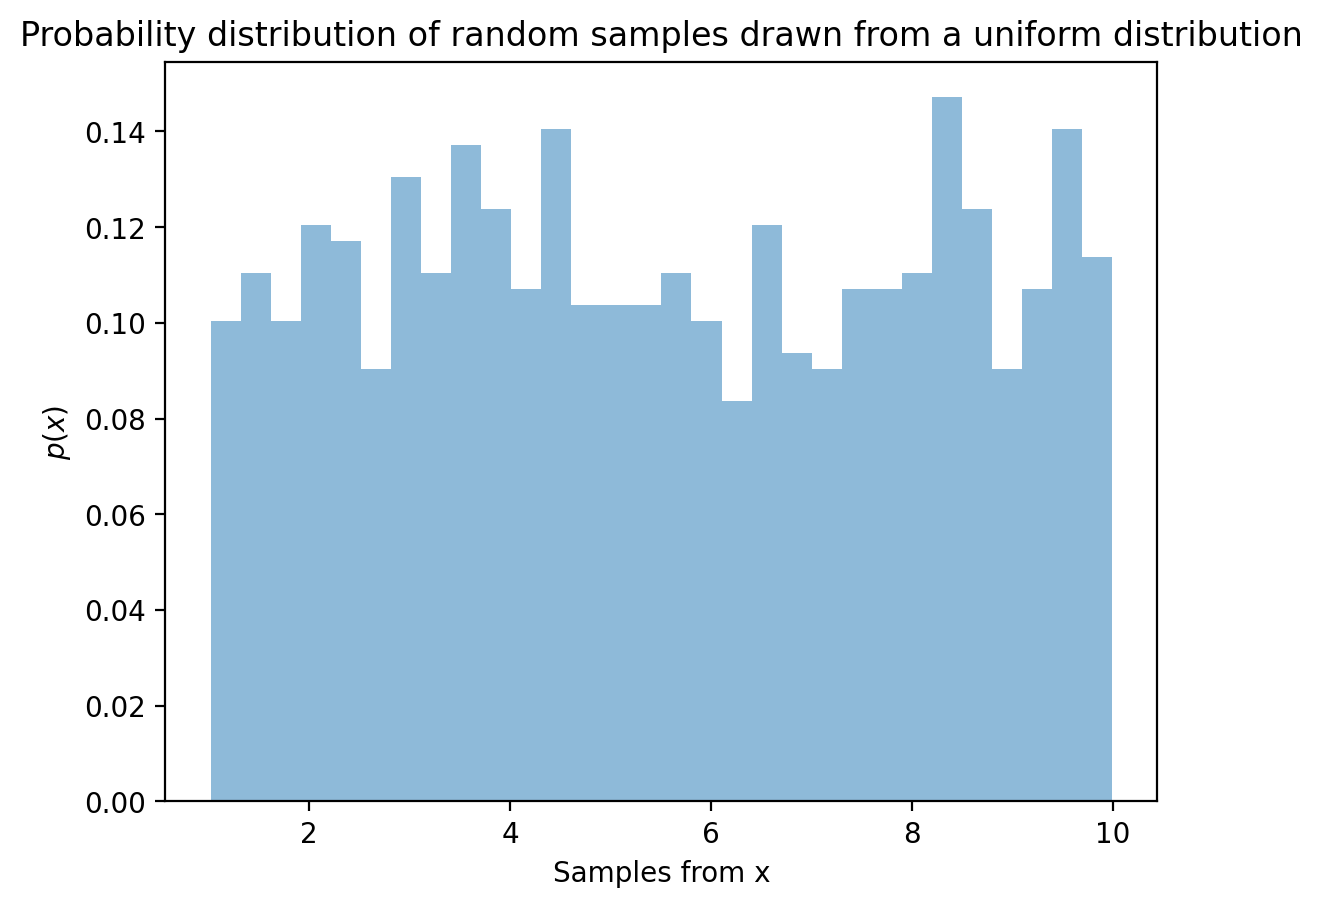

In [3]:
#Create a random number generator 
seed = 1
rng = np.random.default_rng(seed)

#1
x = rng.uniform(1,10,1000)

#2
fig, ax = plt.subplots()
ax.hist(x, bins=30, alpha=0.5, density=True)
ax.set_xlabel('Samples from x')
ax.set_ylabel('$p(x)$')
ax.set_title('Probability distribution of random samples drawn from a uniform distribution')


In [4]:
#3 Exp of array x
y = np.exp(x)


$y = e^{x} \implies x = \log(y)$

The theoretical pdf of y is given by $p(y) = |\frac{dx}{dy}|\, p(x) = e^{-x}\,p(x) = \frac{p(\log y)}{y}$

$p(x)$ is a uniform distribution,

\begin{align}
    p(x) =
    \begin{cases}
    1/9 & 1\,<\,x\,<\,10\\
    0      & \text{otherwise}
    \end{cases}
\end{align}

Therefore, $p(y)$ will be given by

\begin{align}
    p(y) =
    \begin{cases}
    \frac{1}{9\,y} & 1<\log y<10\ ( e < y < e^{10})\\
    0      & \text{otherwise}
    \end{cases}
\end{align}

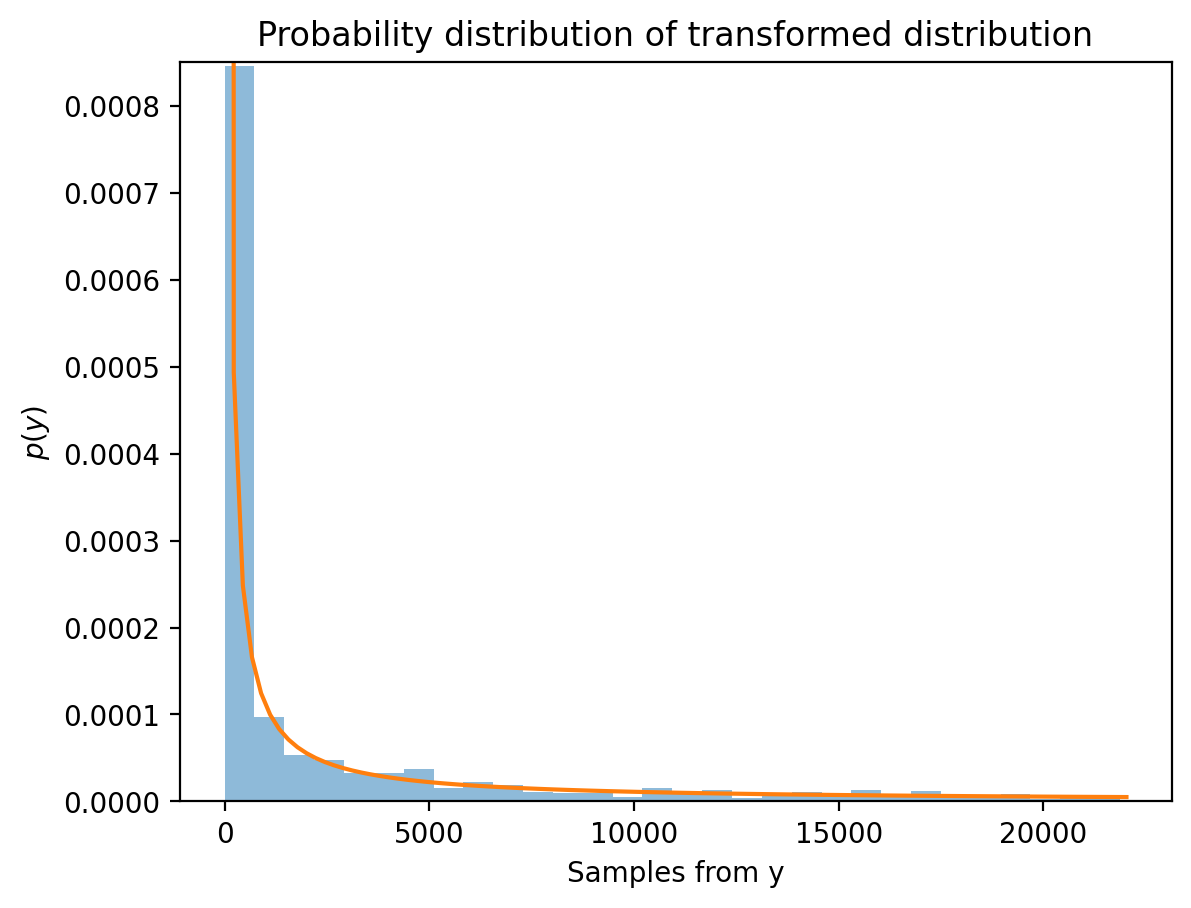

In [12]:
# 4
fig, ax = plt.subplots()
ax.hist(y, bins=30, alpha=0.5, density=True)
ax.set_xlabel('Samples from y')
ax.set_ylabel('$p(y)$')
ax.set_title('Probability distribution of transformed distribution')
ax.set_ylim(0., 0.00085) 
# Thereotical pdf of y
y_range = np.linspace(np.exp(1), np.exp(10), 100)
py = 1/(9*(y_range))

ax.plot(y_range, py)

In [13]:
# 5
#mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)
print(f'Mean of x and y: {mean_x}, {mean_y}')

#Median of x and y
med_x = np.median(x)
med_y = np.median(y)
print(f'Median of x and y: {med_x}, {med_y}')

Mean of x and y: 5.525241810282881, 2556.4272937708283
Median of x and y: 5.444097918724172, 231.38889602497056


### 5
We observe that the mean of x and y are significantly different but the difference in median is not very high. 

## Problem 2

This question is about Monte Carlo integration. The 3$\sigma$ Gaussian confidence level takes the form 

$$ \int_{-3}^{3} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) \,dx \approx 0.997625$$

1) Write down a python code to plot this Gaussian distribution. Can you tell what is the mean and standard daviation of this Gaussain?


2) Draw $N=10^5$ samples from a Gaussian distribution with mean 0 and standard deviation 3 and then perform Monte Carlo integration using the expression on the left hand side above. Confirm that this *approximately* matches the value given the right hand side of the equation.

3) Repeat (2) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

4) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

5) What if you had drawn N samples from a uniform distribution between $[-3, 3]$, how the accuracy of your results have changed?

Text(0.5, 1.0, 'Normal distribution')

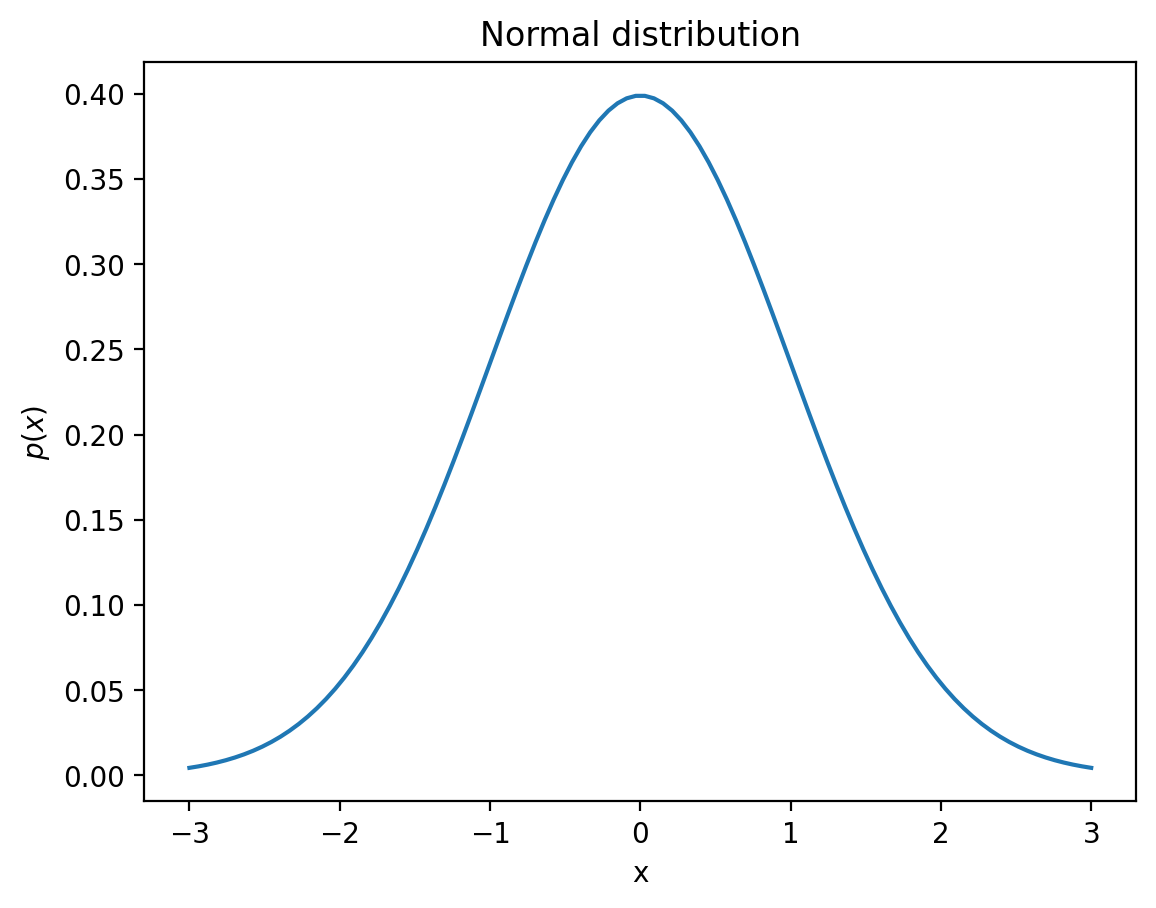

In [75]:
#1 Plotting the Gaussian

def p(x):
    pi=np.pi
    return np.exp(-x**2/2) / np.sqrt(2*pi) 

x_arr = np.linspace(-3,3,100)
p_arr = p(x_arr)

fig, ax = plt.subplots()
ax.plot(x_arr, p_arr)
ax.set_xlabel('x')
ax.set_ylabel('$p(x)$')
ax.set_title('Normal distribution')

We can clearly see that the mean is at 0 (where the peak is) and standard deviation is 1 from the general form of a Gaussian, $\frac{1}{\sqrt{2\pi\sigma^2}}\,\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$

In [ ]:
# 2

N = 10**5

X = rng.normal(0,3,size=N)


## Problem 3
Let x be a continuous random variable with pdf given by $$p(x)=\frac{1}{2}e^{−|x|},$$ for all $x\in\mathbb{R}$. If $y=x^2$, find the cdf of y.